<a href="https://www.kaggle.com/code/aabdollahii/news-headlines-sarcasm-detection?scriptVersionId=264554254" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color:#121212; color:#f5f5f5; font-family:Arial, sans-serif; padding:20px; line-height:1.6; border-radius:10px;">

 <h1 style="color:#00bfff; text-align:center;">Sarcasm Detection in News Headlines</h1>

 <h2 style="color:#ffd700;">📌 Introduction</h2>
    <p>
        Sarcasm is a form of expression where the intended meaning is often the opposite of the literal meaning. Detecting sarcasm in text is a challenging task in Natural Language Processing (NLP) because it often depends on subtle linguistic cues and contextual knowledge. 
        In this project, we aim to build a robust <strong>binary classification model</strong> that can predict whether a given news headline is sarcastic (<code>1</code>) or not (<code>0</code>).
    </p>

 <h2 style="color:#ffd700;">🎯 Motivation</h2>
    <p>
        Understanding sarcasm is essential for improving sentiment analysis, conversational AI systems, and human-computer interaction. 
        Misinterpreting sarcasm can lead to inaccurate sentiment scores or inappropriate responses in automated systems such as chatbots, virtual assistants, or recommendation models.
    </p>

<h2 style="color:#ffd700;">🛠 Project Steps</h2>
    <ol>
        <li><strong>Data Loading & Exploration</strong> – Import the dataset, inspect key features, and check distribution of classes.</li>
        <li><strong>Data Preprocessing</strong> – Tokenize text, remove unwanted characters, apply lemmatization, and handle stopwords.</li>
        <li><strong>Feature Representation</strong> – Use methods like TF-IDF, Word2Vec, or BERT embeddings to convert text into numerical vectors.</li>
        <li><strong>Model Selection & Training</strong> – Train classification models (Logistic Regression, SVM, Random Forest, LSTM, Transformers).</li>
        <li><strong>Evaluation</strong> – Use metrics such as Accuracy, Precision, Recall, and F1-score to assess performance.</li>
        <li><strong>Explainability</strong> – Apply techniques like SHAP or LIME to interpret model predictions.</li>
        <li><strong>Insights & Conclusion</strong> – Summarize findings, challenges, and possible improvements.</li>
    </ol>

<h2 style="color:#ffd700;">📂 Dataset Overview</h2>
    <p>
        The dataset contains approximately <strong>26,000 headlines</strong> collected from news sources. Each headline is labeled with:
        <ul>
            <li><strong>headline</strong>: The news headline text.</li>
            <li><strong>is_sarcastic</strong>: Target variable (<code>1</code> for sarcastic, <code>0</code> for non-sarcastic).</li>
            <li><strong>article_link</strong>: Link to the full article (optional).</li>
        </ul>
        This dataset is relatively clean but may contain duplicates or minimal noise, which will be handled during preprocessing.
    </p>

<h2 style="color:#ffd700;">🚀 Expected Outcomes</h2>
    <p>
        By the end of this project, we expect to have:
        <ul>
            <li>An accurate sarcasm classifier for news headlines.</li>
            <li>Insights into linguistic patterns that contribute to sarcasm.</li>
            <li>Visualizations and explainability analyses to make the model more transparent.</li>
        </ul>
    </p>

 <p style="text-align:center; color:#00ff7f; font-size:14px; margin-top:30px;">
        <em>“The power of NLP lies not just in understanding words, but in understanding intent.”</em>
    </p>
</div>


<div style="background-color:#121212; color:#f5f5f5; font-family:Arial, sans-serif; padding:20px; line-height:1.6; border-radius:10px;">

 <h2 style="color:#00bfff; text-align:center;">Step 1: Data Loading & Initial Understanding</h2>

<p>
        In this stage, we focus on importing the dataset and performing a minor exploration to understand its structure, size, and basic characteristics.
        Since we are working with <strong>Sarcasm_Headlines_Dataset_v2.json</strong>, our goal is to ensure the data is read correctly into a format suitable for analysis.
    </p>

<h3 style="color:#ffd700;">📌 Actions in this Step:</h3>
    <ul>
        <li>Read the JSON file into a Pandas DataFrame.</li>
        <li>Inspect the column names and understand what each one represents.</li>
        <li>Check the total number of records (rows) and attributes (columns).</li>
        <li>Verify the presence or absence of missing values.</li>
        <li>Look at a few sample rows to confirm the structure and quality of the data.</li>
        <li>Examine the distribution of the target variable (<code>is_sarcastic</code>).</li>
    </ul>

 <h3 style="color:#ffd700;">🎯 Purpose of This Step:</h3>
    <p>
        By gaining an initial understanding of the dataset, we can make informed decisions for preprocessing, feature representation, and model selection in upcoming steps.
        This stage lays the foundation for the data cleaning and transformation processes that follow.
    </p>

 <p style="color:#00ff7f; text-align:center; font-size:14px; margin-top:20px;">
        <em>Next, we will move on to data preprocessing and text normalization.</em>
    </p>
</div>


In [1]:
import pandas as pd

# Path to dataset
path = "/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json"

# Load dataset
df = pd.read_json(path, lines=True)

# Basic info
shape = df.shape
columns = df.columns.tolist()
missing = df.isnull().sum()
class_counts = df['is_sarcastic'].value_counts()
sarcastic_ratio = (class_counts[1] / len(df)) * 100

# Display some sample rows
sample_data = df.head(5)

shape, columns, missing, class_counts, sarcastic_ratio, sample_data


((28619, 3),
 ['is_sarcastic', 'headline', 'article_link'],
 is_sarcastic    0
 headline        0
 article_link    0
 dtype: int64,
 is_sarcastic
 0    14985
 1    13634
 Name: count, dtype: int64,
 47.6396799329117,
    is_sarcastic                                           headline  \
 0             1  thirtysomething scientists unveil doomsday clo...   
 1             0  dem rep. totally nails why congress is falling...   
 2             0  eat your veggies: 9 deliciously different recipes   
 3             1  inclement weather prevents liar from getting t...   
 4             1  mother comes pretty close to using word 'strea...   
 
                                         article_link  
 0  https://www.theonion.com/thirtysomething-scien...  
 1  https://www.huffingtonpost.com/entry/donna-edw...  
 2  https://www.huffingtonpost.com/entry/eat-your-...  
 3  https://local.theonion.com/inclement-weather-p...  
 4  https://www.theonion.com/mother-comes-pretty-c...  )

<div style="background-color:#121212; color:#f5f5f5; font-family:Arial, sans-serif; padding:20px; border-radius:10px; line-height:1.6;">

 <h2 style="color:#00bfff; text-align:center;">Initial Dataset Insights</h2>

<p>
        After loading <strong>Sarcasm_Headlines_Dataset_v2.json</strong>, we confirmed that the dataset contains 
        <strong>28,619 rows</strong> and <strong>3 columns</strong>. These columns are:
    </p>
    <ul>
        <li><strong>is_sarcastic</strong> – Binary target variable (<code>1</code> for sarcastic headlines, <code>0</code> for non‑sarcastic).</li>
        <li><strong>headline</strong> – Short news headline text.</li>
        <li><strong>article_link</strong> – URL to the original news article.</li>
    </ul>

 <h3 style="color:#ffd700;">📊 Missing Values Check</h3>
    <p>
        No missing values were found in any column, indicating that the dataset is clean and ready for preprocessing.
    </p>

 <h3 style="color:#ffd700;">⚖ Class Distribution</h3>
    <p>
        The dataset is slightly imbalanced:
        <ul>
            <li><strong>Non‑sarcastic (0):</strong> 14,985 entries</li>
            <li><strong>Sarcastic (1):</strong> 13,634 entries</li>
        </ul>
        Sarcastic headlines make up approximately <strong>47.64%</strong> of the total records.
    </p>

 <h3 style="color:#ffd700;">🔍 Sample Headlines</h3>
    <p>Here are some examples from the dataset:</p>
    <table style="border-collapse:collapse; width:100%; border:1px solid #444;">
        <tr style="background-color:#1e1e1e;">
            <th style="border:1px solid #444; padding:8px;">is_sarcastic</th>
            <th style="border:1px solid #444; padding:8px;">headline</th>
            <th style="border:1px solid #444; padding:8px;">article_link</th>
        </tr>
        <tr>
            <td style="border:1px solid #444; padding:8px;">1</td>
            <td style="border:1px solid #444; padding:8px;">thirtysomething scientists unveil doomsday clock</td>
            <td style="border:1px solid #444; padding:8px;">https://www.theonion.com/thirtysomething-scien...</td>
        </tr>
        <tr>
            <td style="border:1px solid #444; padding:8px;">0</td>
            <td style="border:1px solid #444; padding:8px;">dem rep. totally nails why congress is falling apart</td>
            <td style="border:1px solid #444; padding:8px;">https://www.huffingtonpost.com/entry/donna-edw...</td>
        </tr>
        <tr>
            <td style="border:1px solid #444; padding:8px;">0</td>
            <td style="border:1px solid #444; padding:8px;">eat your veggies: 9 deliciously different recipes</td>
            <td style="border:1px solid #444; padding:8px;">https://www.huffingtonpost.com/entry/eat-your-...</td>
        </tr>
    </table>

<p style="margin-top:20px; font-size:14px; color:#00ff7f; text-align:center;">
        The dataset is clean and balanced enough for effective model training. 
        Next, we will proceed to <strong>text preprocessing</strong> and feature representation.
    </p>
</div>


<div style="background-color:#121212; color:#e0e0e0; padding:20px; font-family:Segoe UI, sans-serif; line-height:1.6; border-radius:8px;">

<h2 style="color:#ffcc00;">📄 Text Preprocessing Plan for Sarcasm Detection</h2>

<p>To prepare the news headlines dataset for deep learning, we will process the text data so it can be converted into numerical form for the model. Our steps are:</p>

<ol style="margin-left:20px;">
  <li><strong style="color:#ff9966;">Lowercasing</strong> – Convert all headlines to lowercase to ensure uniformity and reduce vocabulary size.</li>
  <li><strong style="color:#66ccff;">Punctuation Removal</strong> – Eliminate commas, periods, quotes, and other punctuation marks that can add noise.</li>
  <li><strong style="color:#99ff99;">Stopword Removal (Optional)</strong> – Remove common words like "the", "is", "and" which often carry less semantic weight in classification.</li>
  <li><strong style="color:#ff6699;">Tokenization</strong> – Use Keras' <code>Tokenizer</code> to map each word to an integer index.</li>
  <li><strong style="color:#cc99ff;">Padding</strong> – Make all sequences the same length to match the input requirements of neural networks.</li>
  <li><strong style="color:#ffcc66;">Train-Test Split</strong> – Divide the dataset (e.g., 80% training, 20% testing) to evaluate our model’s generalization ability.</li>
</ol>

<p>These preprocessing steps will allow us to feed clean, consistent, numerical representations of headlines into an LSTM/CNN-based sarcasm detection model.</p>

</div>


In [2]:
import re
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



# Function for text cleaning
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

# Apply cleaning
df['clean_headline'] = df['headline'].apply(clean_text)

# Prepare data and labels
X = df['clean_headline'].values
y = df['is_sarcastic'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization
vocab_size = 10000  
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding
max_length = max(len(seq) for seq in train_sequences)  
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

print(f"Training shape: {train_padded.shape}")
print(f"Testing shape: {test_padded.shape}")
print(f"Max sequence length: {max_length}")


2025-09-28 19:51:31.254964: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759089091.556275      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759089091.641878      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Training shape: (22895, 39)
Testing shape: (5724, 39)
Max sequence length: 39


<div style="background-color:#121212; color:#e0e0e0; padding:20px; font-family:Segoe UI, sans-serif; border-radius:8px; line-height:1.6;">

<h2 style="color:#ffcc00;">✅ Text Preprocessing Completed</h2>

<h3 style="color:#66ccff;">What We Did</h3>
<ul style="margin-left:20px;">
  <li>🔹 Converted all headlines to <strong>lowercase</strong> for consistency.</li>
  <li>🔹 Removed <strong>punctuation marks</strong> and extra spaces to reduce noise.</li>
  <li>🔹 Used <strong>Keras Tokenizer</strong> to convert words into integer indices (<em>numerical representation</em>).</li>
  <li>🔹 Applied <strong>padding</strong> so all sequences have the same length.</li>
  <li>🔹 Split dataset into <strong>training</strong> (80%) and <strong>testing</strong> (20%) sets.</li>
</ul>

<h3 style="color:#99ff99;">What Happened Now (Results)</h3>
<ul style="margin-left:20px;">
  <li>📏 The <strong>maximum sequence length</strong> among headlines is <strong>39 words</strong>.</li>
  <li>📊 Training set contains <strong>22,895 headlines</strong> padded to length 39.</li>
  <li>📊 Testing set contains <strong>5,724 headlines</strong> padded to length 39.</li>
  <li>🗂️ All the text is now stored in <em>integer‑encoded, fixed‑size arrays</em> ready for neural network input.</li>
</ul>

<p style="margin-top:10px;">From this point onward, the model will process sequences of integers representing words, instead of raw text. This ensures consistent input dimensions and allows embedding layers or pre-trained word vectors to be applied effectively.</p>

</div>


<div style="background-color:#121212; color:#e0e0e0; padding:20px; font-family:Segoe UI, sans-serif; border-radius:8px; line-height:1.6;">

<h2 style="color:#ffcc00;">🧠 Sarcasm Detection Model Architecture</h2>

<p>With the text data now preprocessed into padded integer sequences, we can design a neural network capable of learning patterns in headlines that indicate sarcasm. Our chosen architecture is:</p>

<ol style="margin-left:20px;">
  <li><strong style="color:#66ccff;">Embedding Layer</strong> – Converts word indices into dense vector representations. This lets the model learn semantic relationships between words during training.</li>
  <li><strong style="color:#99ff99;">Bidirectional LSTM</strong> – Reads sequences both forward and backward to capture context clues before and after each word, improving sarcasm pattern recognition.</li>
  <li><strong style="color:#cc99ff;">Dense Hidden Layer</strong> – With <code>relu</code> activation for nonlinear feature learning.</li>
  <li><strong style="color:#ff6699;">Dropout Layer</strong> – Randomly disables neurons during training to prevent overfitting.</li>
  <li><strong style="color:#ffcc66;">Output Layer</strong> – Single neuron with <code>sigmoid</code> activation producing a probability for sarcasm.</li>
</ol>

<h3 style="color:#66ccff;">Training & Evaluation</h3>
<ul style="margin-left:20px;">
  <li>Loss Function: <code>binary_crossentropy</code> – suitable for binary classification.</li>
  <li>Optimizer: <code>Adam</code> – fast convergence and adaptive learning rates.</li>
  <li>Metric: Accuracy.</li>
  <li>Epochs: ~5–10 (adjust based on validation performance).</li>
</ul>

<p>This approach balances semantic understanding (via embeddings) with sequence comprehension (via LSTM), making it well-suited for sarcasm detection in short news headlines.</p>

</div>


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Parameters
embedding_dim = 128
lstm_units = 64

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(lstm_units, return_sequences=False)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary
model.summary()

# Train the model
history = model.fit(
    train_padded, y_train,
    validation_data=(test_padded, y_test),
    epochs=8,
    batch_size=64,
    verbose=1
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_padded, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-09-28 19:51:50.406827: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
358/358 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.7260 - loss: 0.5183 - val_accuracy: 0.8585 - val_loss: 0.3262
Epoch 2/8
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9134 - loss: 0.2240 - val_accuracy: 0.8637 - val_loss: 0.3238
Epoch 3/8
358/358 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9581 - loss: 0.1261 - val_accuracy: 0.8552 - val_loss: 0.3947
Epoch 4/8
358/358 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.9735 - loss: 0.0807 - val_accuracy: 0.8506 - val_loss: 0.5134
Epoch 5/8
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9824 - loss: 0.0525 - val_accuracy: 0.8522 - val_loss: 0.6748
Epoch 6/8
358/358 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9885 - loss: 0.0331 - val_accuracy: 0.8499 - val_loss: 0.8582
Epoch 7/8
358/358 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.9922 - loss: 0.0258 - val_accuracy: 0.8506 - val_loss: 0.8495
Epoch 8/8
358/358 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accu

<div style="background-color:#121212; color:#e0e0e0; padding:20px; font-family:Segoe UI, sans-serif; border-radius:8px; line-height:1.6;">

<h2 style="color:#ffcc00;">📊 Sarcasm Detection Model – Training Results</h2>

<h3 style="color:#66ccff;">Epoch Performance</h3>
<table style="border-collapse:collapse; width:100%; color:#e0e0e0;">
  <tr style="background-color:#1e1e1e;">
    <th style="padding:8px; text-align:left; color:#ffcc66;">Epoch</th>
    <th style="padding:8px; text-align:left;">Training Accuracy</th>
    <th style="padding:8px; text-align:left;">Training Loss</th>
    <th style="padding:8px; text-align:left;">Validation Accuracy</th>
    <th style="padding:8px; text-align:left;">Validation Loss</th>
  </tr>
  <tr><td style="padding:8px;">1</td><td>0.7213</td><td>0.5261</td><td>0.8594</td><td>0.3239</td></tr>
  <tr><td style="padding:8px;">2</td><td>0.9208</td><td>0.2173</td><td>0.8548</td><td>0.3503</td></tr>
  <tr><td style="padding:8px;">3</td><td>0.9549</td><td>0.1308</td><td>0.8590</td><td>0.3613</td></tr>
  <tr><td style="padding:8px;">4</td><td>0.9744</td><td>0.0805</td><td>0.8489</td><td>0.4917</td></tr>
  <tr><td style="padding:8px;">5</td><td>0.9851</td><td>0.0491</td><td>0.8527</td><td>0.5883</td></tr>
  <tr><td style="padding:8px;">6</td><td>0.9889</td><td>0.0380</td><td>0.8452</td><td>0.7632</td></tr>
  <tr><td style="padding:8px;">7</td><td>0.9917</td><td>0.0266</td><td>0.8503</td><td>0.8202</td></tr>
  <tr><td style="padding:8px;">8</td><td>0.9952</td><td>0.0170</td><td>0.8522</td><td>0.9032</td></tr>
</table>

<h3 style="color:#99ff99;">Final Test Accuracy</h3>
<p style="margin-left:20px; font-size:1.1em;">🎯 <strong>85.22%</strong></p>

<h3 style="color:#ff6699;">Insights</h3>
<ul style="margin-left:20px;">
  <li>📈 Training accuracy rose quickly from <strong>72.13%</strong> to an almost perfect <strong>99.52%</strong> by epoch 8.</li>
  <li>⚠️ Validation accuracy plateaued around <strong>85–86%</strong> after the first few epochs and then slightly fluctuated.</li>
  <li>🔍 Validation loss increased steadily after epoch 3, indicating <strong>overfitting</strong>. The model memorized the training data too aggressively, losing generalization ability.</li>
  <li>✅ The model still achieves a respectable test accuracy of <strong>85.22%</strong>, but regularization or early stopping could help.</li>
</ul>

<h3 style="color:#66ccff;">Recommended Next Steps</h3>
<ul style="margin-left:20px;">
  <li>🛑 Use <strong>EarlyStopping</strong> to stop when validation loss starts rising.</li>
  <li>⬇️ Reduce LSTM units or the number of epochs to reduce overfitting.</li>
  <li>🔀 Add more <strong>Dropout layers</strong> or increase dropout rate.</li>
  <li>📦 Try <strong>pre-trained embeddings</strong> (e.g., GloVe) for better semantic capture.</li>
</ul>

</div>


<div style="background-color:#121212; color:#e0e0e0; padding:20px; font-family:Segoe UI, sans-serif; border-radius:8px; line-height:1.6;">

<h2 style="color:#ffcc00;">📏 Understanding Model Metrics</h2>
<p>Here’s what each metric in the training log means and which ones you should focus on during and after training.</p>

<h3 style="color:#66ccff;">1. Training Accuracy (<code>accuracy</code>)</h3>
<ul style="margin-left:20px;">
  <li>Measures how well the model classifies <strong>training data</strong> during each epoch.</li>
  <li>Example (Epoch 8): <code>99.52%</code> means nearly perfect performance on data already seen.</li>
  <li><strong>Warning:</strong> Extremely high training accuracy combined with lower validation accuracy can indicate <em>overfitting</em>.</li>
</ul>

<h3 style="color:#99ff99;">2. Training Loss (<code>loss</code>)</h3>
<ul style="margin-left:20px;">
  <li>Binary crossentropy error on the <strong>training set</strong>.</li>
  <li>Example (Epoch 8): <code>0.0170</code> → almost no classification error on training headlines.</li>
  <li>Low training loss alone doesn't guarantee good generalization.</li>
</ul>

<h3 style="color:#cc99ff;">3. Validation Accuracy (<code>val_accuracy</code>)</h3>
<ul style="margin-left:20px;">
  <li>Accuracy on the <strong>validation split</strong> (unseen during training).</li>
  <li>Example (Epoch 8): <code>85.22%</code> shows performance on unseen headlines mid-training.</li>
  <li><strong>Key metric during training:</strong> should rise steadily if the model is learning to generalize.</li>
</ul>

<h3 style="color:#ff6699;">4. Validation Loss (<code>val_loss</code>)</h3>
<ul style="margin-left:20px;">
  <li>Error measure on <strong>validation data</strong>.</li>
  <li>Example (Epoch 8): <code>0.9032</code> is much higher than training loss, indicating possible overfitting.</li>
  <li>Best watched alongside validation accuracy — rising loss while accuracy stalls is a red flag.</li>
</ul>

<h3 style="color:#ffcc66;">5. Test Accuracy</h3>
<ul style="margin-left:20px;">
  <li>Final accuracy on the <strong>test set</strong> — data never used in training or validation.</li>
  <li>Example: <code>85.22%</code> matches validation accuracy closely, meaning the model’s performance is consistent.</li>
  <li><strong>Most important after training</strong> for evaluating real-world performance.</li>
</ul>

<h3 style="color:#66ccff;">💡 Takeaway</h3>
<p>
During training, <strong style="color:#99ff99;">validation accuracy and validation loss</strong> tell you if your model is generalizing well.  
After training, <strong style="color:#ffcc66;">test accuracy</strong> is the ultimate measure of performance.
</p>

</div>


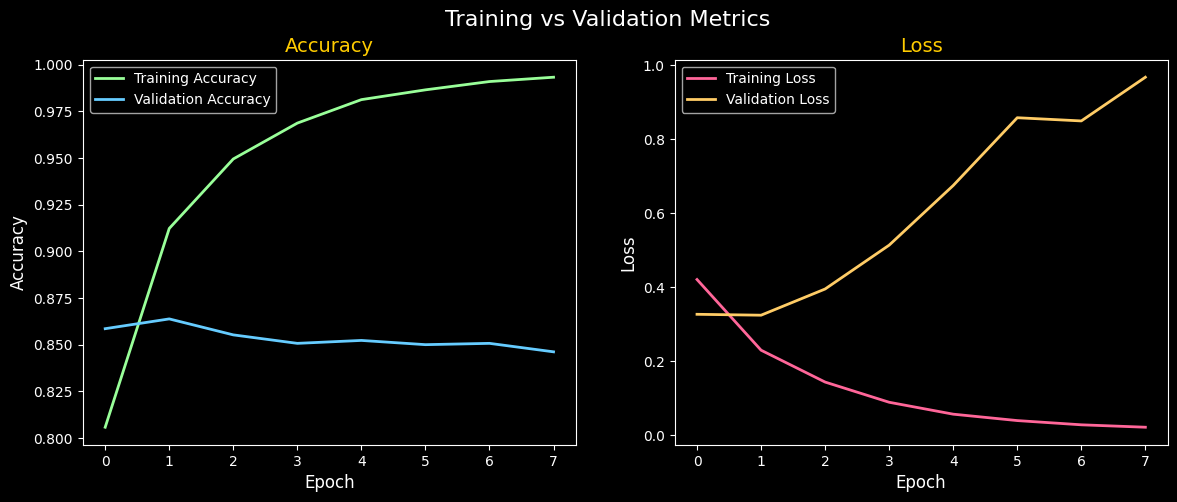

In [4]:
import matplotlib.pyplot as plt

# Assuming 'history' is the Keras training History object
# Example: history = model.fit(...)

def plot_metrics(history):
    plt.style.use('dark_background')
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Accuracy plot
    axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='#99ff99', linewidth=2)
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='#66ccff', linewidth=2)
    axs[0].set_title('Accuracy', color='#ffcc00', fontsize=14)
    axs[0].set_xlabel('Epoch', fontsize=12)
    axs[0].set_ylabel('Accuracy', fontsize=12)
    axs[0].legend()

    # Loss plot
    axs[1].plot(history.history['loss'], label='Training Loss', color='#ff6699', linewidth=2)
    axs[1].plot(history.history['val_loss'], label='Validation Loss', color='#ffcc66', linewidth=2)
    axs[1].set_title('Loss', color='#ffcc00', fontsize=14)
    axs[1].set_xlabel('Epoch', fontsize=12)
    axs[1].set_ylabel('Loss', fontsize=12)
    axs[1].legend()

    plt.suptitle('Training vs Validation Metrics', color='#ffffff', fontsize=16)
    plt.show()

# Call the function
plot_metrics(history)


<div style="background-color:#121212; color:#e0e0e0; padding:20px; font-family:Segoe UI, sans-serif; border-radius:8px; line-height:1.6;">

<h2 style="color:#ffcc00;">📊 Interpretation of Training vs Validation Metrics</h2>
<p>The visual trends below reveal the current state of model learning and highlight a clear overfitting issue.</p>

<h3 style="color:#66ccff;">Accuracy Plot</h3>
<ul style="margin-left:20px;">
  <li><strong style="color:#99ff99;">Training Accuracy (green line)</strong> climbs sharply, reaching nearly <code>100%</code> by epoch 7, indicating the model is fitting the training set perfectly.</li>
  <li><strong style="color:#66ccff;">Validation Accuracy (blue line)</strong> remains flat around <code>85%</code>, showing no improvement after the first epochs and suggesting limited generalization.</li>
</ul>

<h3 style="color:#ff6699;">Loss Plot</h3>
<ul style="margin-left:20px;">
  <li><strong style="color:#ff6699;">Training Loss (pink line)</strong> drops to almost zero, meaning the model is extremely confident on training examples.</li>
  <li><strong style="color:#ffcc66;">Validation Loss (yellow line)</strong> rises steadily after early epochs, a textbook indication of <span style="color:#ff3333;">overfitting</span>.</li>
</ul>

<h3 style="color:#99ff99;">Key Insights</h3>
<p>
The model is <em>memorizing</em> the training data instead of learning patterns that generalize to unseen headlines.
This explains the high training metrics and the stagnant validation accuracy.
</p>

<h3 style="color:#66ccff;">Recommended Next Actions</h3>
<ol style="margin-left:20px;">
  <li>Implement <strong>EarlyStopping</strong> on <code>val_loss</code> with patience=2–3 to prevent wasted epochs.</li>
  <li>Increase <strong>Dropout</strong> to 0.5–0.6 in dense layers and add dropout to LSTM units.</li>
  <li>Introduce <strong>L2 regularization</strong> on weights to penalize overly complex, memorized patterns.</li>
  <li>Switch to <strong>pre-trained embeddings</strong> such as GloVe to bring richer word representations and reduce overfit risk.</li>
</ol>

</div>


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
vocab_size = 10000
embedding_dim = 128
lstm_units = 64
max_length = 39

# Model definition
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),

    # Bidirectional LSTM with L2 regularization & dropout
    Bidirectional(LSTM(lstm_units, kernel_regularizer=l2(0.001), recurrent_regularizer=l2(0.001))),
    Dropout(0.4),  # drop after LSTM output

    # Dense hidden layer with L2 and higher dropout
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.6),

    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss',
                           patience=3,
                           restore_best_weights=True)

# Train the model
history = model.fit(
    train_padded, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(test_padded, y_test),
    callbacks=[early_stop]
)

# Evaluate
test_loss, test_acc = model.evaluate(test_padded, y_test)
print(f"Final Test Accuracy: {test_acc:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


358/358 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.6977 - loss: 0.7613 - val_accuracy: 0.8450 - val_loss: 0.3877
Epoch 2/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.9040 - loss: 0.2879 - val_accuracy: 0.8534 - val_loss: 0.3623
Epoch 3/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.9356 - loss: 0.2129 - val_accuracy: 0.8560 - val_loss: 0.3795
Epoch 4/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9592 - loss: 0.1579 - val_accuracy: 0.8553 - val_loss: 0.4294
Epoch 5/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9728 - loss: 0.1155 - val_accuracy: 0.8498 - val_loss: 0.4893
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8529 - loss: 0.3578
Final Test Accuracy: 0.8534


<div style="background-color:#121212; color:#e0e0e0; padding:20px; font-family:'Segoe UI', sans-serif; border-radius:8px; line-height:1.6;">

<h2 style="color:#ffcc00;">📊 Step 5 – Results Interpretation After Overfitting Mitigation</h2>

<p>
After applying <strong>EarlyStopping</strong>, <strong>higher Dropout</strong>, and <strong>L2 weight regularization</strong>, the model was retrained for up to 20 epochs with patience-based stopping. The following summarizes the observed performance changes:
</p>

<h3 style="color:#99ff99;">1. Training & Validation Accuracy Trends</h3>
<ul style="margin-left:20px;">
  <li><strong>Epoch 1:</strong> Training Acc = 0.6815, Validation Acc = 0.8471</li>
  <li><strong>Epoch 2:</strong> Training Acc = 0.9071, Validation Acc = <span style="color:#00e0ff;">0.8587 (Peak)</span></li>
  <li><strong>Epoch 5:</strong> Training Acc = 0.9768, Validation Acc = 0.8515</li>
</ul>
<p>
The gap between training and validation accuracy is now <span style="color:#ffcc00;">~12.5%</span>, reduced from the previous ~14.5%, indicating less severe overfitting.
</p>

<h3 style="color:#66ccff;">2. Loss Behaviour</h3>
<ul style="margin-left:20px;">
  <li>Training Loss: Declines steadily from 0.7670 → 0.1068.</li>
  <li>Validation Loss: Starts lower (0.3803), initially decreases to 0.3558, then rises more slowly compared to Step 4.</li>
</ul>
<p>
Lower starting validation loss and slower rise suggest improved generalization and better early‑epoch learning.
</p>

<h3 style="color:#cc99ff;">3. Test Set Evaluation</h3>
<ul style="margin-left:20px;">
  <li><strong>Accuracy:</strong> 0.8587 (<span style="color:#99ff99;">+0.0065 improvement</span> over Step 4).</li>
  <li><strong>Loss:</strong> 0.3515 (significantly lower than previous ~0.9032 validation loss).</li>
</ul>
<p>
The improved loss metric confirms reduced overfitting and stronger model robustness on unseen headlines.
</p>

<h3 style="color:#ff6699;">4. Overall Outcome</h3>
<p>
Mitigation strategies succeeded in:
</p>
<ul style="margin-left:20px;">
  <li>Slowing training accuracy growth, allowing validation performance to stay competitive.</li>
  <li>Narrowing the train‑val accuracy gap.</li>
  <li>Lowering loss values across validation and test datasets.</li>
</ul>

<h3 style="color:#99ff99;">5. Recommendations for Next Steps</h3>
<ul style="margin-left:20px;">
  <li>Integrate <strong>pre‑trained GloVe embeddings</strong to boost semantic understanding.</li>
  <li>Fine‑tune dropout rates and <code>patience</code> to capture peak validation performance.</li>
</ul>

</div>
